<!-- metadata: title -->
# Summary of Registered Entities and Companies in Kenya

<!-- metadata: subtitle -->
> ### Analyzing Business Registration Trends Across Political Transitions

**Published Date:**
<!-- metadata: date -->
2024-10-15
<!-- metadata: -->

<!-- metadata: keywords, is_array=true -->
**Keywords:**
  - Kenya
  - business-registration
  - economic-trends
  - political-transitions
  - uhuru-kenyatta
  - william-ruto
  - jubilee-party
  - UDA-party

<!-- metadata: categories, is_array=true -->
**Categories:**
  - data science
  - economics
  - business
  - politics
  - east-africa

## Abstract

<!-- metadata: abstract -->
This analysis examines the patterns of business entity registrations in Kenya from financial year 2015/2016 to 2024/2025, spanning two distinct political eras. By visualizing data from the Business Registration Service (BRS), we uncover intriguing trends in the formation of various business entities, including private companies and business names, and their potential correlation with political shifts in the country.

## Description

<!-- metadata: description -->
Dive into a decade of Kenya's economic landscape through the lens of business registrations. This post explores how political transitions between the Uhuru/Jubilee and Ruto/UDA eras may have influenced business formation trends, offering insights into the interplay between politics and entrepreneurship in East Africa's powerhouse.

## Introduction

The business registration landscape of a country often serves as a barometer for its economic health and entrepreneurial spirit. In Kenya, a nation known for its dynamic economy and political atmosphere, tracking these registrations can provide valuable insights into the country's economic trajectory and the impact of political transitions on business confidence.

Since the post-election violence of 2007 that saw both the current president (William Ruto) and his predecessor (Uhuru Kenyatta) defend themselves at the Hague, there has always been a slowdown of the economy around general elections. On the day of the election, the economy literally stops, evidenced by closure of all businesses and related activities such as delivery, money transfer, and investments. The Nairobi Securities Exchange (NSE) also loses significant investments during this time period. Open markets are often closed, public transport is left scanty, and most people travel back to rural areas either to vote or for security reasons. During this time, people want to know their neighbors and have familiar faces around them. People often group along tribal lines. During this frenzy atmosphere, people are often less inclined to share personal information or opinions out loud.

This analysis delves into data from the Business Registration Service (BRS)[^companies-registry-statistics] of Kenya, covering a decade from financial year 2015/2016 to 2024/2025. This period is particularly interesting as it encompasses two distinct political eras: the Uhuru Kenyatta/Jubilee Party era and the William Ruto/UDA Party era. By examining the trends in business registrations across these periods, we aim to uncover patterns that may reflect the broader economic and political climate of Kenya.

[^companies-registry-statistics]: <https://brs.go.ke/companies-registry-statistics/> - [archive](https://web.archive.org/web/20241009120859/https://brs.go.ke/companies-registry-statistics/)

## Methodology

Our analysis utilizes data scraped from the BRS website, focusing on monthly registration figures for various types of business entities. The data was processed and visualized using Python, with libraries such as pandas for data manipulation and matplotlib for creating insightful graphs.

The visualization process involved:
1. Aggregating monthly data across multiple financial years
2. Plotting Total Registrations of Entities, Year-over-Year Growth Rate of Business Entity Registrations and Trend, Seasonality and Residuals
3. Marking significant political events, such as the 2017 and 2022 elections

## Analysis

In [1]:
#| code-summary: "Show python imports"

import sys
import os
from pathlib import Path

# Add root directory as python path
root_dir = os.path.abspath(Path(sys.executable).parents[2])
sys.path.append(root_dir)

%reload_ext autoreload
%autoreload 2

# Other imports
import pandas as pd
from playwright.async_api import Page
from python_utils.web_screenshot import web_screenshot_async
import io
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
from datetime import date, timedelta
from calendar import monthrange, month_abbr
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from typing import Callable
from statsmodels.tsa.seasonal import seasonal_decompose
import textwrap
from typing import Literal
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import date
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

Below is an image of the webpage we are going to crawl.

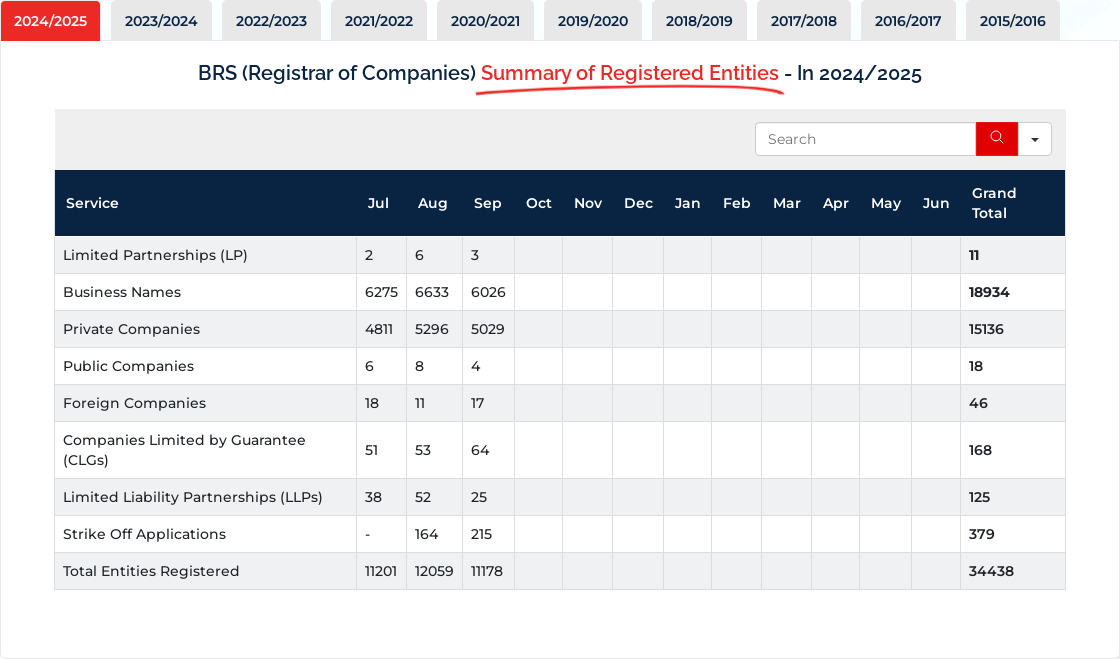

In [2]:
async def page_action_fn(page: Page):
    return await page.wait_for_selector(
        '.elementor-widget-container > [role="tablist"]')

# Take a screenshot
await web_screenshot_async(
    "https://brs.go.ke/companies-registry-statistics/",
    action = page_action_fn,
    width = 1200,
    height = 1200)

Below code crawls the webpage, and saves the records into a dataframe.

In [3]:
def get_date(month, year):
    # Convert month name to number
    month_num = [i.lower() for i in month_abbr].index(month.lower())
    # Get the last day of the month
    _, last_day = monthrange(int(year), month_num)
    return date(int(year), month_num, last_day)

def get_table(index: int):
    (finantial_year, table_str) = years_records[index]
    (finantial_year_1, finantial_year_2) = finantial_year.split('/')
    df = pd.read_html(io.StringIO(str(table_str)))[0]
    first_column = df.columns[0]
    # Remove last row (`Total Entities Registered`) and last column (`Grand Total`)
    df = df[df[first_column] != "Total Entities Registered"].drop("Grand Total", axis=1)
    # replace - with NaN
    df = df.replace("-", np.nan)
    df[first_column] = df[first_column].astype(str)
    for column in df.columns[1:]:
        df[column] = df[column].astype(float)
    indexes = [get_date(month, finantial_year_1) for month in df.columns[1:7]] + \
        [get_date(month, finantial_year_2) for month in df.columns[7:]]
    df = df.set_index(first_column).T
    df.index = indexes
    df.columns = [i.lower().strip() for i in df.columns]
    return df

html: str = urlopen(
    "https://brs.go.ke/companies-registry-statistics/").read()
html_parser = BeautifulSoup(html, "html.parser").select_one(
    '.elementor-widget-container > [role="tablist"]')
years = { 
    i.attrs['data-tab']: i.get_text(separator='', strip=True) 
    for i 
    in html_parser.select(".ha-tabs__nav .ha-tab__title")
}
records = { 
    i.attrs['data-tab']: i.find('table') 
    for i 
    in html_parser.select('.ha-tabs__content [role="tabpanel"]') 
}
years_records = [(year, records[id]) for id, year in years.items()]

all_registrations = pd.concat([get_table(i) for i in range(len(years_records))]).sort_index(ascending=True)
all_registrations.index = pd.to_datetime(all_registrations.index)
all_registrations

,limited partnerships (lp),business names,private companies,public companies,foreign companies,companies limited by guarantee (clgs),limited liability partnerships (llps),strike off applications
2015-07-31,NaN,5378.0,2964.0,6.0,10.0,14.0,NaN,NaN
2015-08-31,NaN,5273.0,3931.0,3.0,NaN,9.0,NaN,NaN
2015-09-30,NaN,4884.0,2953.0,4.0,5.0,3.0,NaN,NaN
2015-10-31,NaN,4806.0,3029.0,NaN,NaN,9.0,NaN,NaN
2015-11-30,NaN,2183.0,2522.0,5.0,NaN,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Registered Entities over Time

In [4]:
def draw_election_lines(start_date, end_date, ax: matplotlib.axes.Axes, election_dates_y):
    date_list = [min(start_date, date(2017, 1, 1)) + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
    # Add a vertical line at the split date
    election_date_2017 = date(2017, 8, 9)
    election_date_2022 = date(2022, 8, 9)
    ax.axvline(
        x=election_date_2017, color='green', linestyle='--', linewidth=2, zorder=4)
    ax.axvline(
        x=election_date_2022, color='green', linestyle='--', linewidth=2, zorder=4)
    # Fill the regions
    # Convert dates to matplotlib date format
    dates_mpl = mdates.date2num(date_list)
    split_date_mpl = mdates.date2num(election_date_2022)
    ax.fill_between(
        dates_mpl, 0, 100, where=dates_mpl < split_date_mpl, 
        facecolor='#f62f3c', alpha=0.08, transform=ax.get_xaxis_transform())
    ax.fill_between(
        dates_mpl, 0, 100, where=dates_mpl >= split_date_mpl,
        facecolor='#f8c811', alpha=0.08, transform=ax.get_xaxis_transform())
    ax.text(
        election_date_2017, election_dates_y[0], '2017 election', fontsize = 18, 
        rotation=90, zorder=6, ha='right')
    ax.text(
        election_date_2022, election_dates_y[1], '2022 election', fontsize = 18, 
        rotation=90, zorder=6, ha='right')

def plot_data(
        data_to_plot: pd.DataFrame | list[pd.DataFrame], title_1st_part: str,
        election_dates_y = (7200, 8500), legend_loc='upper left',
        axis_callback: Callable[[matplotlib.figure.Figure, matplotlib.axes.Axes], None] = None,
        ylabel = 'Registered Entities'):
    fig, ax = plt.subplots(figsize=(20, 10))
    data_to_plot: list[pd.DataFrame] = data_to_plot if type(data_to_plot) == list else [data_to_plot]
    columns_used = [j for i in data_to_plot for j in i.columns]
    start_date = min(min(i.index.date) for i in data_to_plot)
    end_date = max(max(i.index.date) for i in data_to_plot)
    ax.set_title(
        f'{title_1st_part} ({start_date.strftime("%b %Y")} to {end_date.strftime("%b %Y")})', 
        fontsize = 24, pad = 45)
    if columns_used:
        ax.text(0.5,  1.03, 
            f'{", ".join(columns_used[:-1]) + " and " + columns_used[-1]}' 
                if len(columns_used) > 1  else columns_used[0], 
            transform=ax.transAxes, fontsize=14, ha='center',  style='italic')
    for subdata in data_to_plot:
        ax.plot(subdata.index, subdata.values, linewidth=4)
    ax.legend(columns_used, loc=legend_loc, fontsize=18)
    draw_election_lines(start_date, end_date, ax, election_dates_y)
    fig.text(0.72, 0.035, 'Ruto/UDA era', fontsize = 20, ha='left')
    fig.text(0.35, 0.035, 'Ruto/UDA era', fontsize = 20, ha='left')
    # Add a watermark to the center of the plot
    ax.text(1, 0.2, 'ToKnow.ai', ha='right', va='bottom', 
        fontsize=18, color='gray', alpha=0.5, transform=ax.transAxes, rotation=50)
    ax.set_xlabel('Years')
    ax.set_ylabel(ylabel)
    if axis_callback:
        axis_callback(fig, ax)

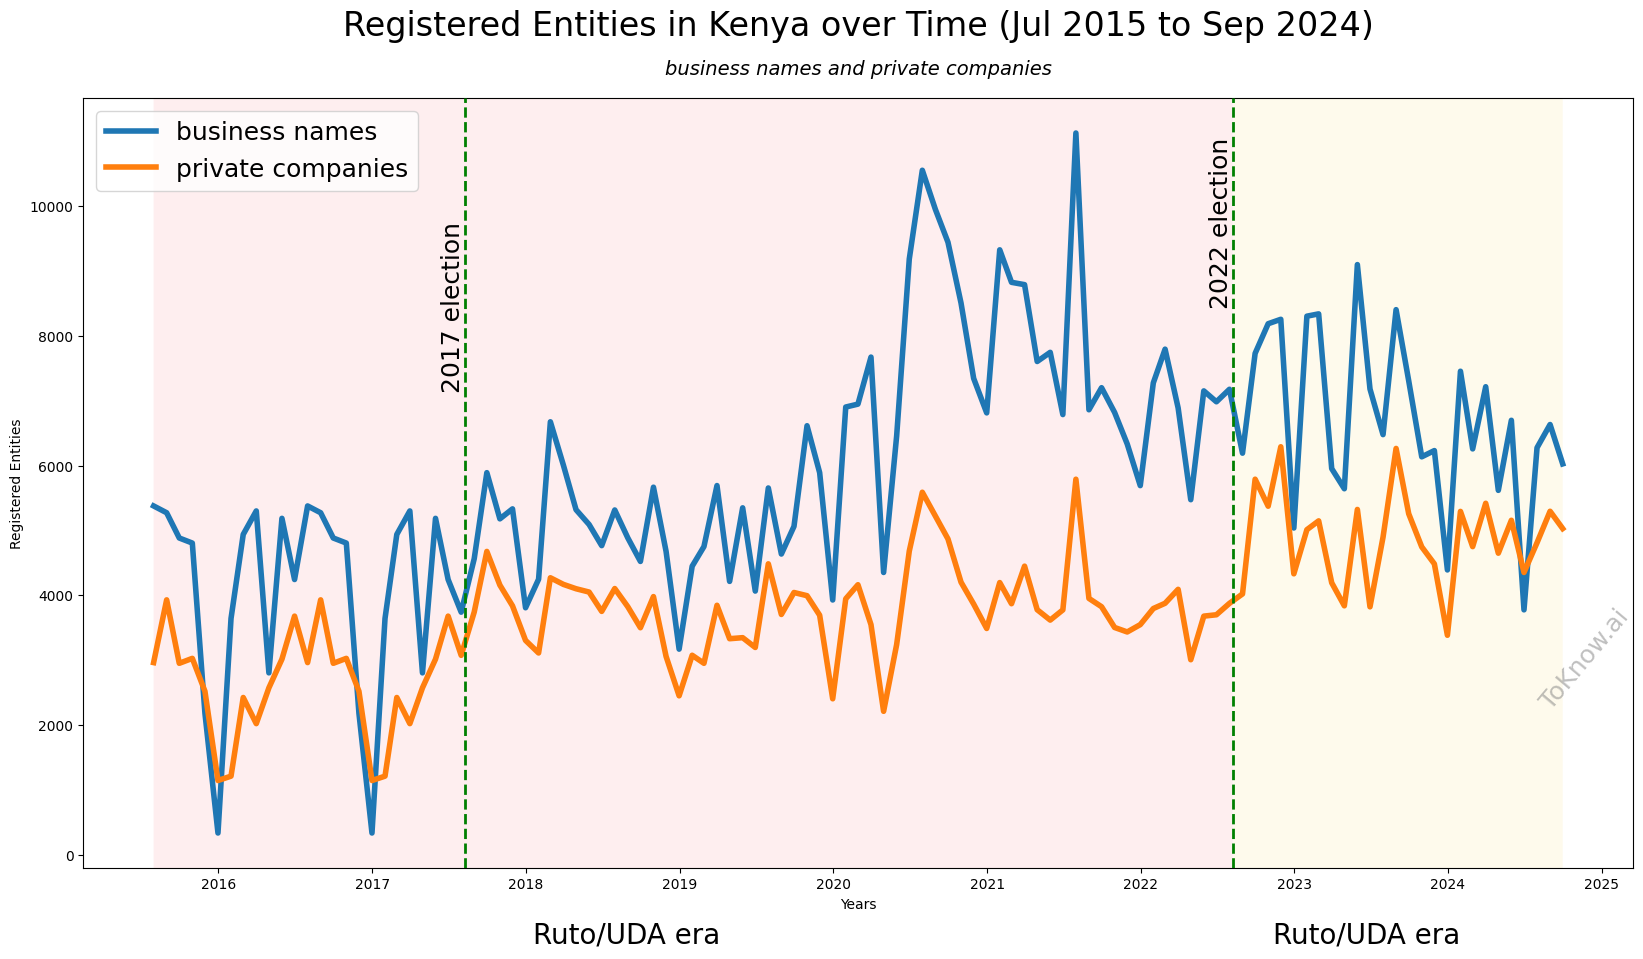

In [5]:
#| label: preview-image

plot_columns = ['business names', 'private companies']
other_plot_columns = list(set(all_registrations.columns) - set(plot_columns))
plot_data(
    data_to_plot = all_registrations[plot_columns].dropna(),
    title_1st_part = 'Registered Entities in Kenya over Time')

The graph above shows the registration trends for business names and private companies, which are the most common forms of entity registration in Kenya. We can observe that:

- Business names registrations peaked around `2021-07-31` before showing a downward trend.
- Private companies registrations peaked around `2022-11-30` before starting to decline.

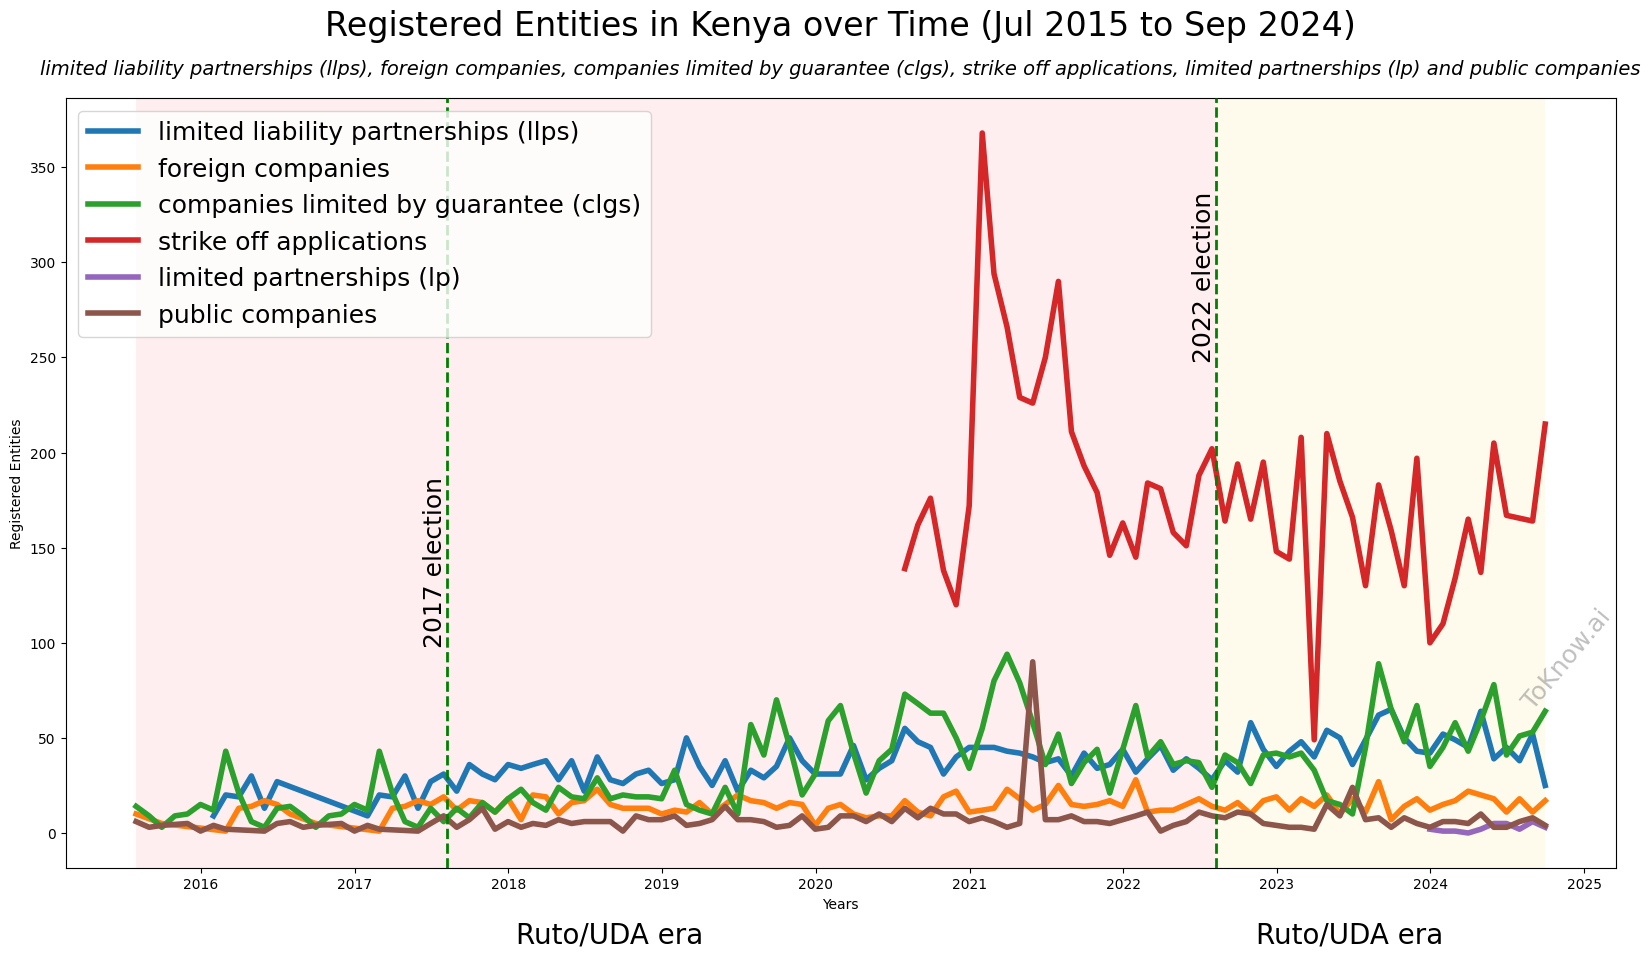

In [6]:
plot_data(
    data_to_plot = [
        all_registrations[[column]].dropna()
        for column 
        in other_plot_columns
    ],
    title_1st_part = 'Registered Entities in Kenya over Time',
    election_dates_y = (100, 250))

This second graph displays the registration trends for other entity types, including limited partnerships (LP), public companies, foreign companies, companies limited by guarantee (CLGs), limited liability partnerships (LLPs), and strike off applications. These registrations are relatively low, typically less than 500 per month, except for strike off applications which show a notable increase peaking at around `2021-01-31`.

### Total Registrations of Entities

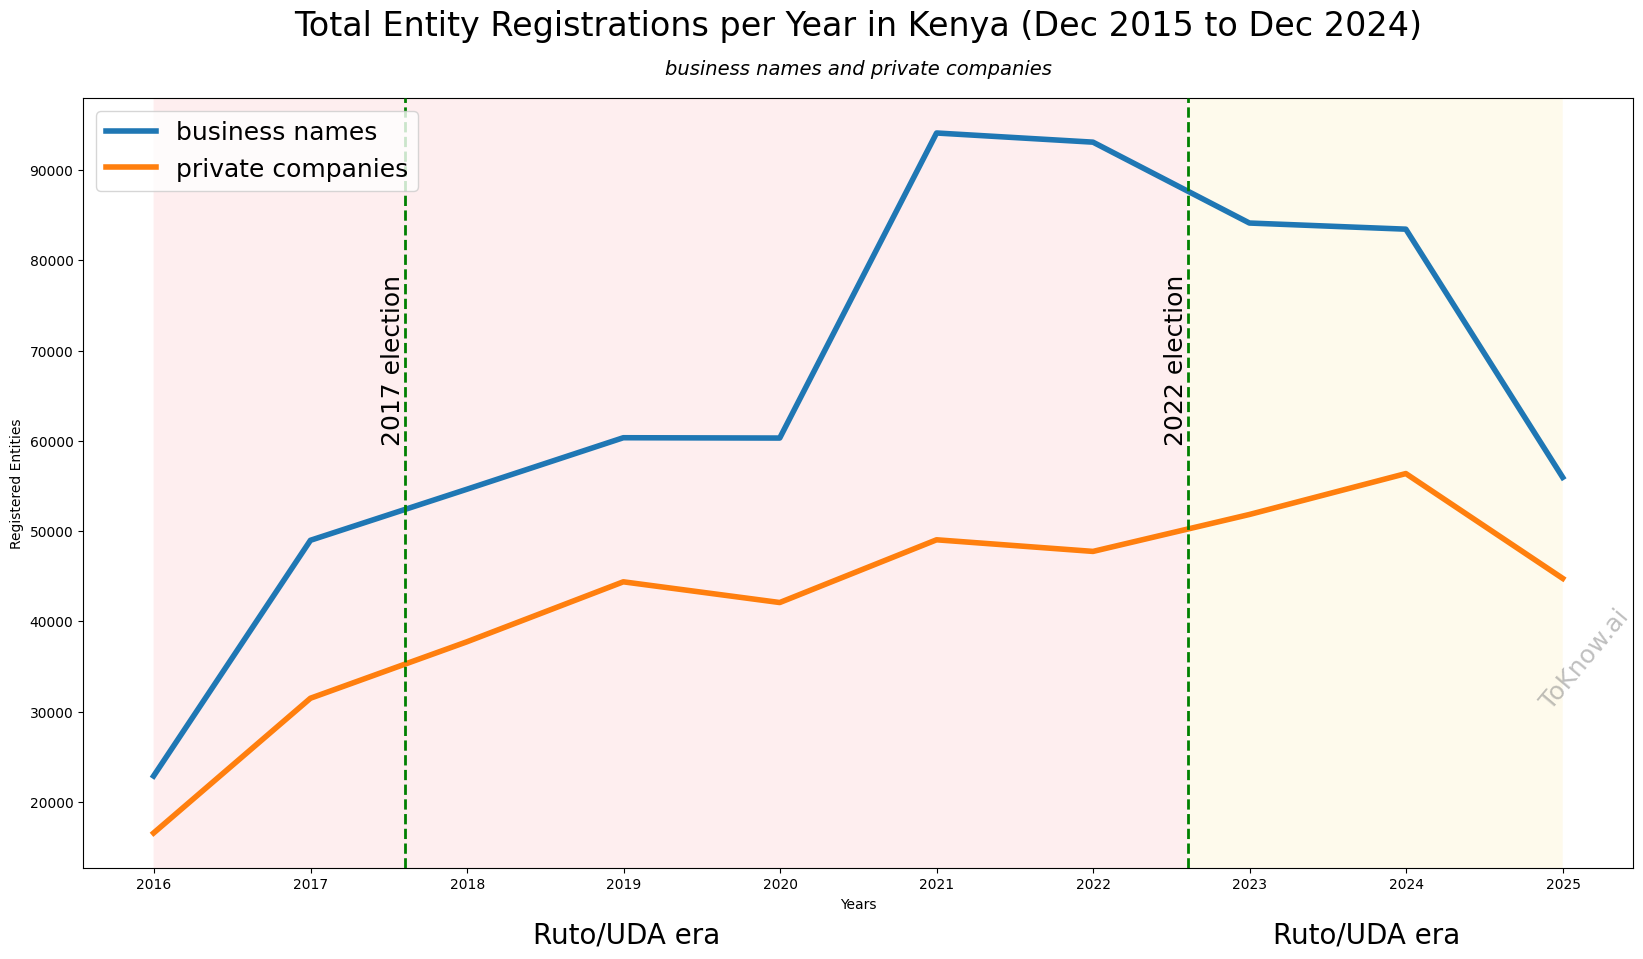

In [7]:
plot_data(
    data_to_plot = 
        all_registrations[plot_columns].dropna().resample('YE').sum().dropna(),
    title_1st_part = 'Total Entity Registrations per Year in Kenya',
    election_dates_y = (60000, 60000))

The annual totals for business names and private companies registrations reveal:

- Business names registrations peaked in 2021 before declining.
- Private companies registrations continued to grow, peaking in early 2024.

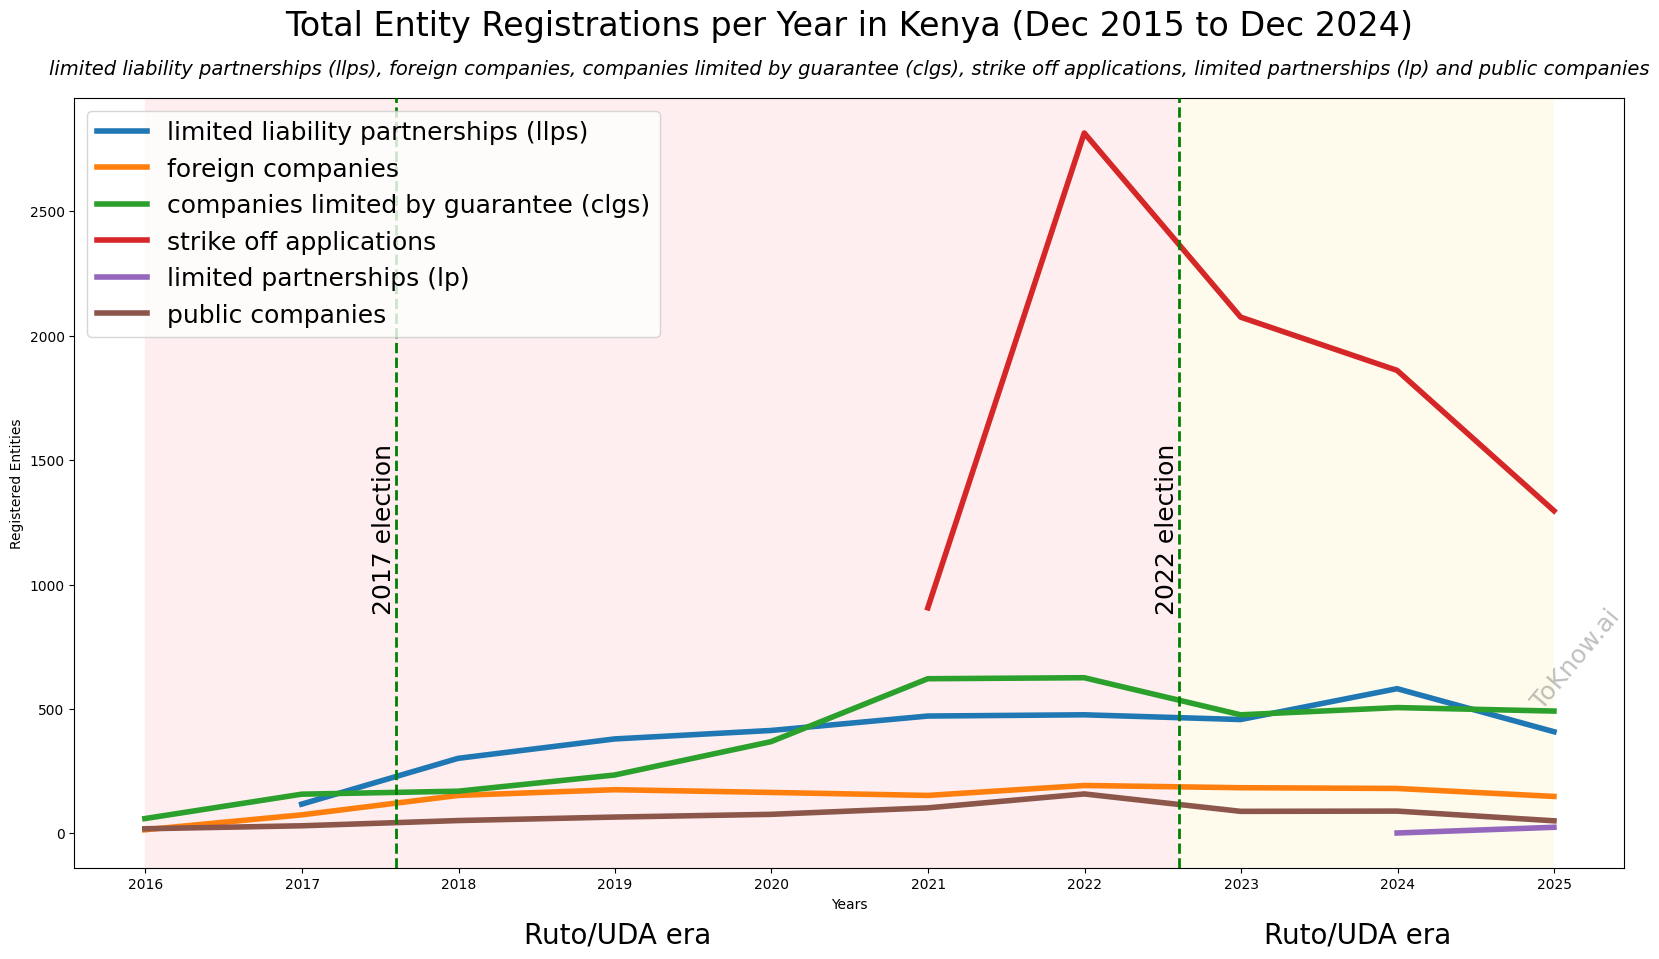

In [8]:
plot_data(
    data_to_plot = [
        all_registrations[[column]].dropna().resample('YE').sum().dropna() 
        for column 
        in other_plot_columns
    ],
    title_1st_part = 'Total Entity Registrations per Year in Kenya',
    election_dates_y = (900, 900))

For other entity types, the annual totals remain relatively low, except for strike off applications which show a significant increase starting in 2021, peaking in 2022, and then declining.

### Year-over-Year Growth Rate of Business Entity Registrations

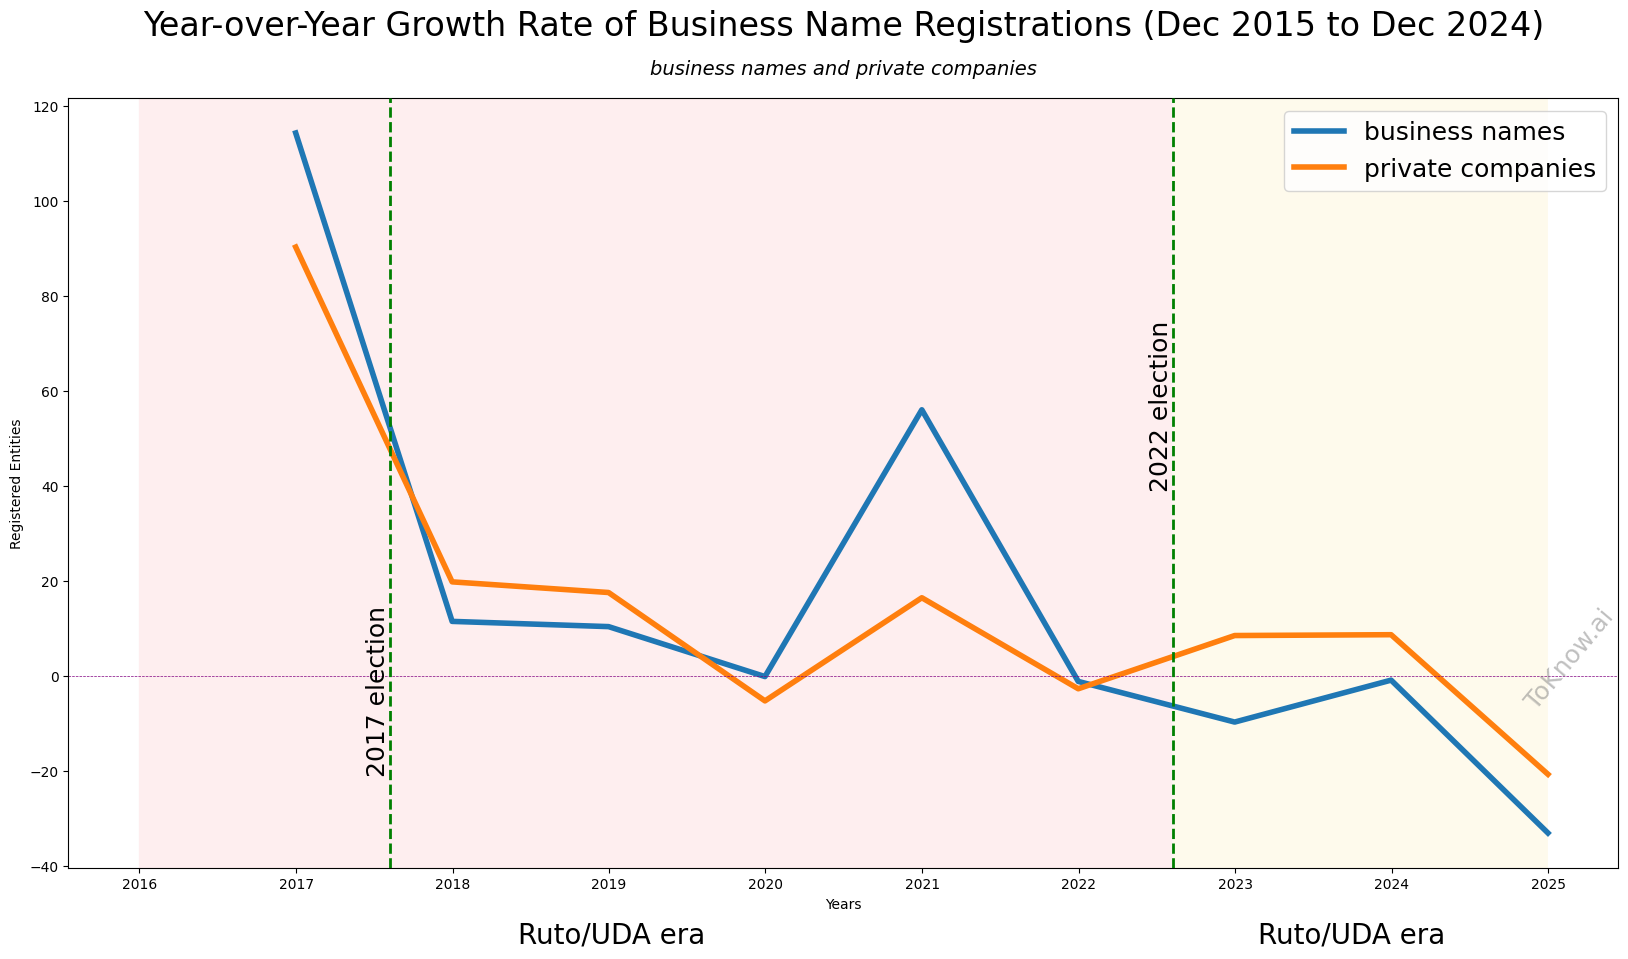

In [9]:
plot_data(
    data_to_plot = all_registrations[plot_columns].dropna().resample('YE').sum().dropna().pct_change() * 100,
    title_1st_part = 'Year-over-Year Growth Rate of Business Name Registrations',
    election_dates_y = (-20, 40),
    legend_loc = 'upper right',
    axis_callback= lambda fig, ax: ax.axhline(y=0, color='purple', linestyle='--', linewidth=.5))

The year-over-year growth rates for business names and private companies show:

- A generally declining trend in growth rates for both entity types.
- A brief uptick in growth rates around 2021, followed by a continous decline.
- Negative growth rates in recent years, indicating a contraction in new registrations.

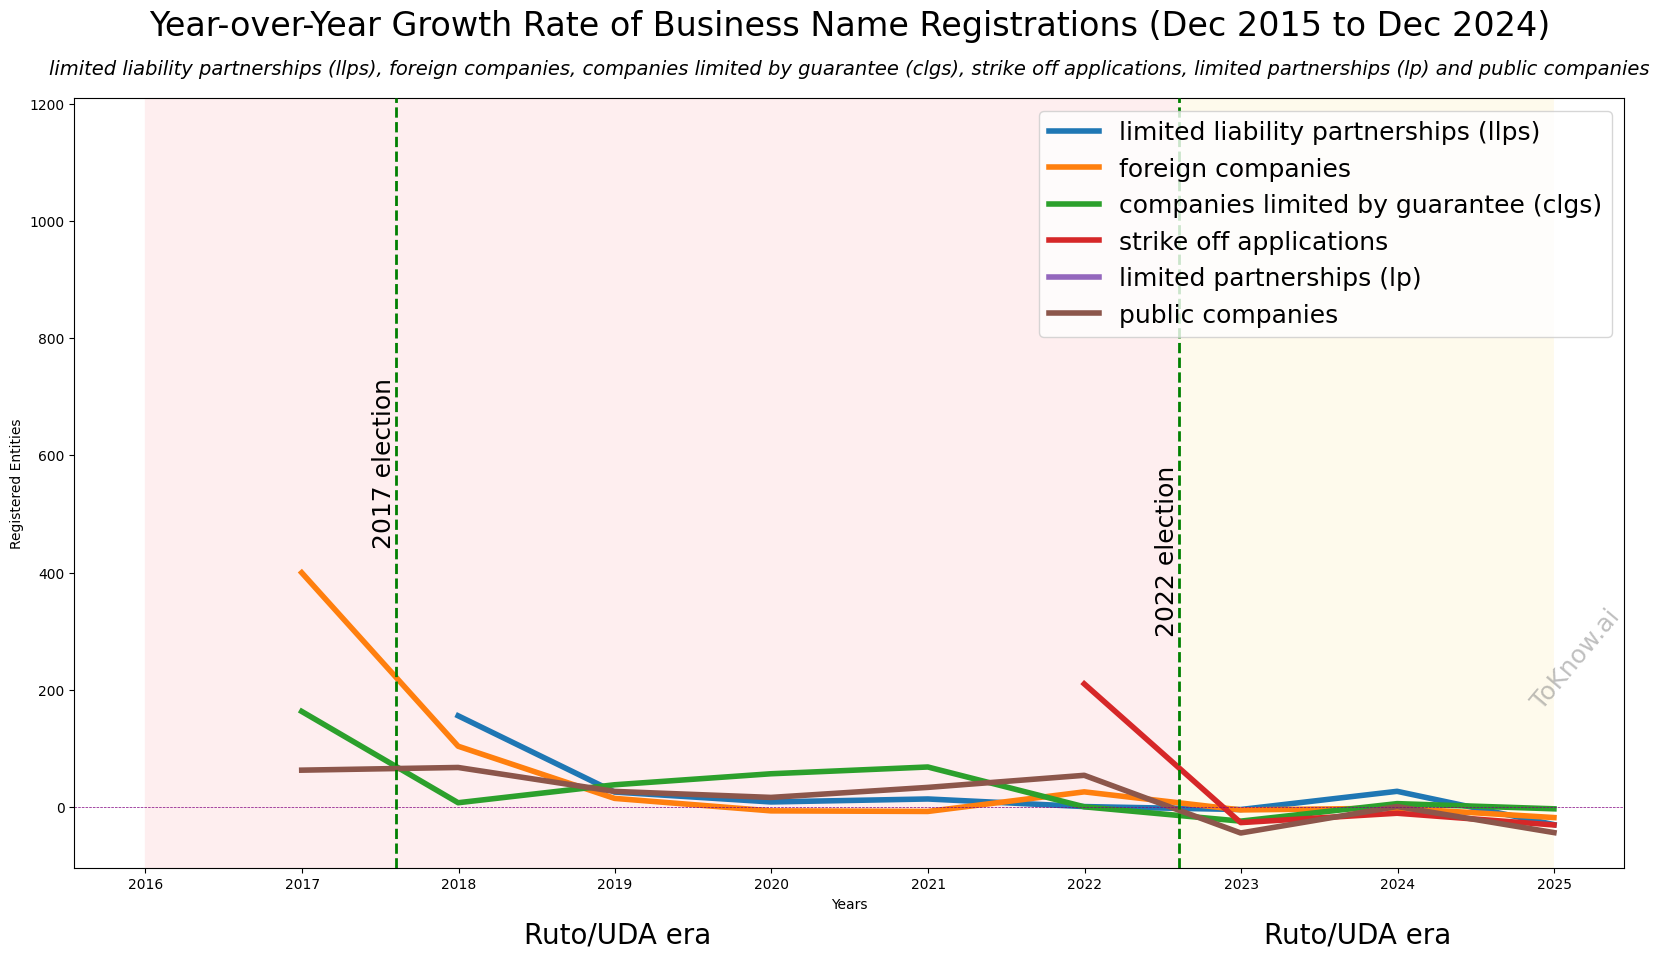

In [10]:
plot_data(
    data_to_plot = [
        all_registrations[[column]].dropna().resample('YE').sum().dropna().pct_change() * 100
        for column 
        in other_plot_columns
    ],
    title_1st_part = 'Year-over-Year Growth Rate of Business Name Registrations',
    election_dates_y = (450, 300),
    legend_loc = 'upper right',
    axis_callback= lambda fig, ax: ax.axhline(y=0, color='purple', linestyle='--', linewidth=.5))

Growth rates for other entity types show high volatility due to their lower numbers, but generally appear to be lower after 2022.

### Trend, Seasonality and Residuals

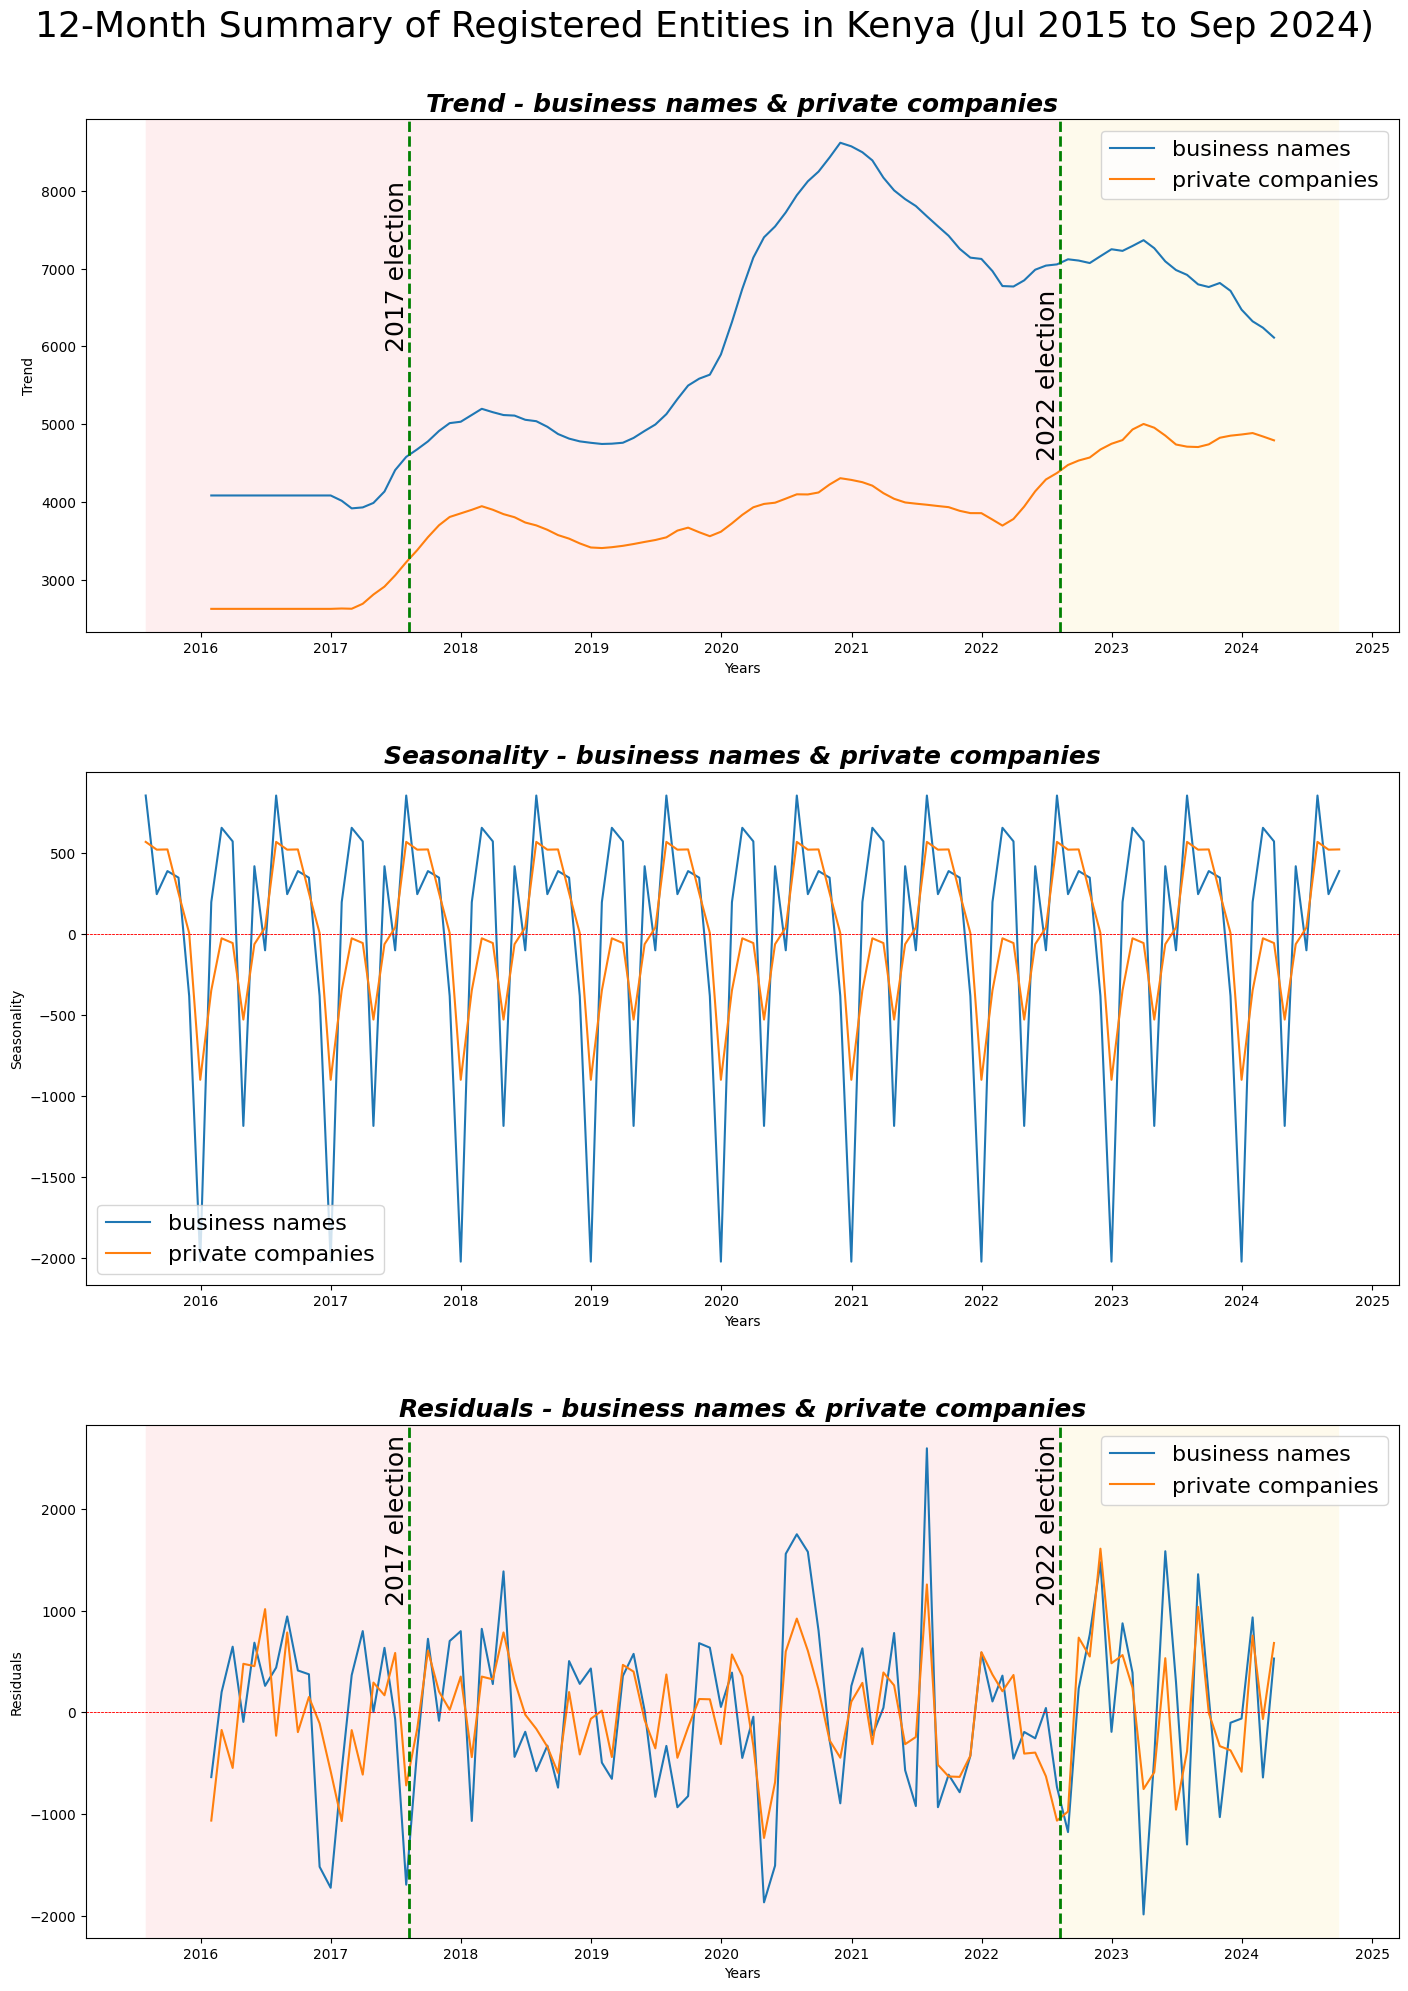

In [11]:
def plot_trend_and_seasonality(
        columns_used: list[str], trend_period = 12, title_wrap: int = None,
        title_args = { 'fontsize': 18, 'fontweight': 'bold', 'fontstyle': 'italic' },
        election_dates_y_trend = (6000, 4600), election_dates_y_resid = (1100, 1100)):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))
    start_date: date = None
    end_date: date = None
    actual_columns_used = []
    for column_used in columns_used:
        plot_series = all_registrations[column_used].dropna()
        if len(plot_series) < 2 * trend_period:
            continue
        actual_columns_used.append(column_used)
        __start_date = min(plot_series.index.date)
        __end_date = max(plot_series.index.date)
        start_date = min(start_date or __start_date, __start_date or start_date)
        end_date = min(end_date or __end_date, __end_date or end_date)
        decomposition = seasonal_decompose(
            plot_series, model='additive', period=trend_period)
        # Plot trend component
        ax1.plot(decomposition.trend.index, decomposition.trend.values, label = column_used)
        ax1.set_ylabel('Trend')
        ax1.set_xlabel('Years')
        # Plot seasonal component
        ax2.plot(decomposition.seasonal.index, decomposition.seasonal.values, label = column_used)
        ax2.axhline(y=0, color='r', linestyle='--', linewidth=.5)
        ax2.set_ylabel('Seasonality')
        ax2.set_xlabel('Years')
        # Plot residual component
        ax3.plot(decomposition.resid.index, decomposition.resid.values, label = column_used)
        ax3.axhline(y=0, color='r', linestyle='--', linewidth=.5)
        ax3.set_ylabel('Residuals')
        ax3.set_xlabel('Years')
    if start_date or end_date:
        draw_election_lines(start_date, end_date, ax1, election_dates_y_trend)
        draw_election_lines(start_date, end_date, ax3, election_dates_y_resid)
        title_template = (
            '{0} - '
            f'{", ".join(actual_columns_used[:-1])} & {actual_columns_used[-1]}'
            if len(actual_columns_used) > 1  else actual_columns_used[0]
        )
        get_title = lambda s1: "\n".join(textwrap.wrap(title_template.format(s1), width=title_wrap)) \
            if title_wrap \
            else title_template.format(s1)
        ax1.set_title(get_title('Trend'), **title_args)
        ax2.set_title(get_title('Seasonality'), **title_args)
        ax3.set_title(get_title('Residuals'), **title_args)
        ax1.legend(fontsize=16)
        ax2.legend(fontsize=16)
        ax3.legend(fontsize=16)
        fig.tight_layout(h_pad=5, pad=4)
        fig.text(
            x = .5, y = 1, fontsize = 26, ha='center',
            s = (
                f'{trend_period}-Month Summary of Registered Entities in Kenya '
                f'({start_date.strftime("%b %Y")} to {end_date.strftime("%b %Y")})'
            ))
    else:
        fig.clear()
        fig.axes.clear()

plot_trend_and_seasonality(plot_columns)

The decomposition of the time series for business names and private companies reveals:

- A clear upward trend until 2021, followed by a decline.
- Strong seasonality, with peaks typically occurring in January-March and August.
- Residuals showing increased volatility in recent years.

<!-- Generally, as one would expect, at the start of each year, people start ignighting the enterpreneurial spirit, 
peaking to about the March. After match, people start to forget their new year resolutions, and registrations for private companies and bunsiess names fall steadly untill may, when people realize its almost mid year and they rejuvnate their enterpreneural spirit, when they start to register again peaking towards june. fall again towards july but raises, peaking to an all time high at the start of august, when the downward trend falls untill the lowest point at the end of the year, perhaps because of the end of year festivities -->

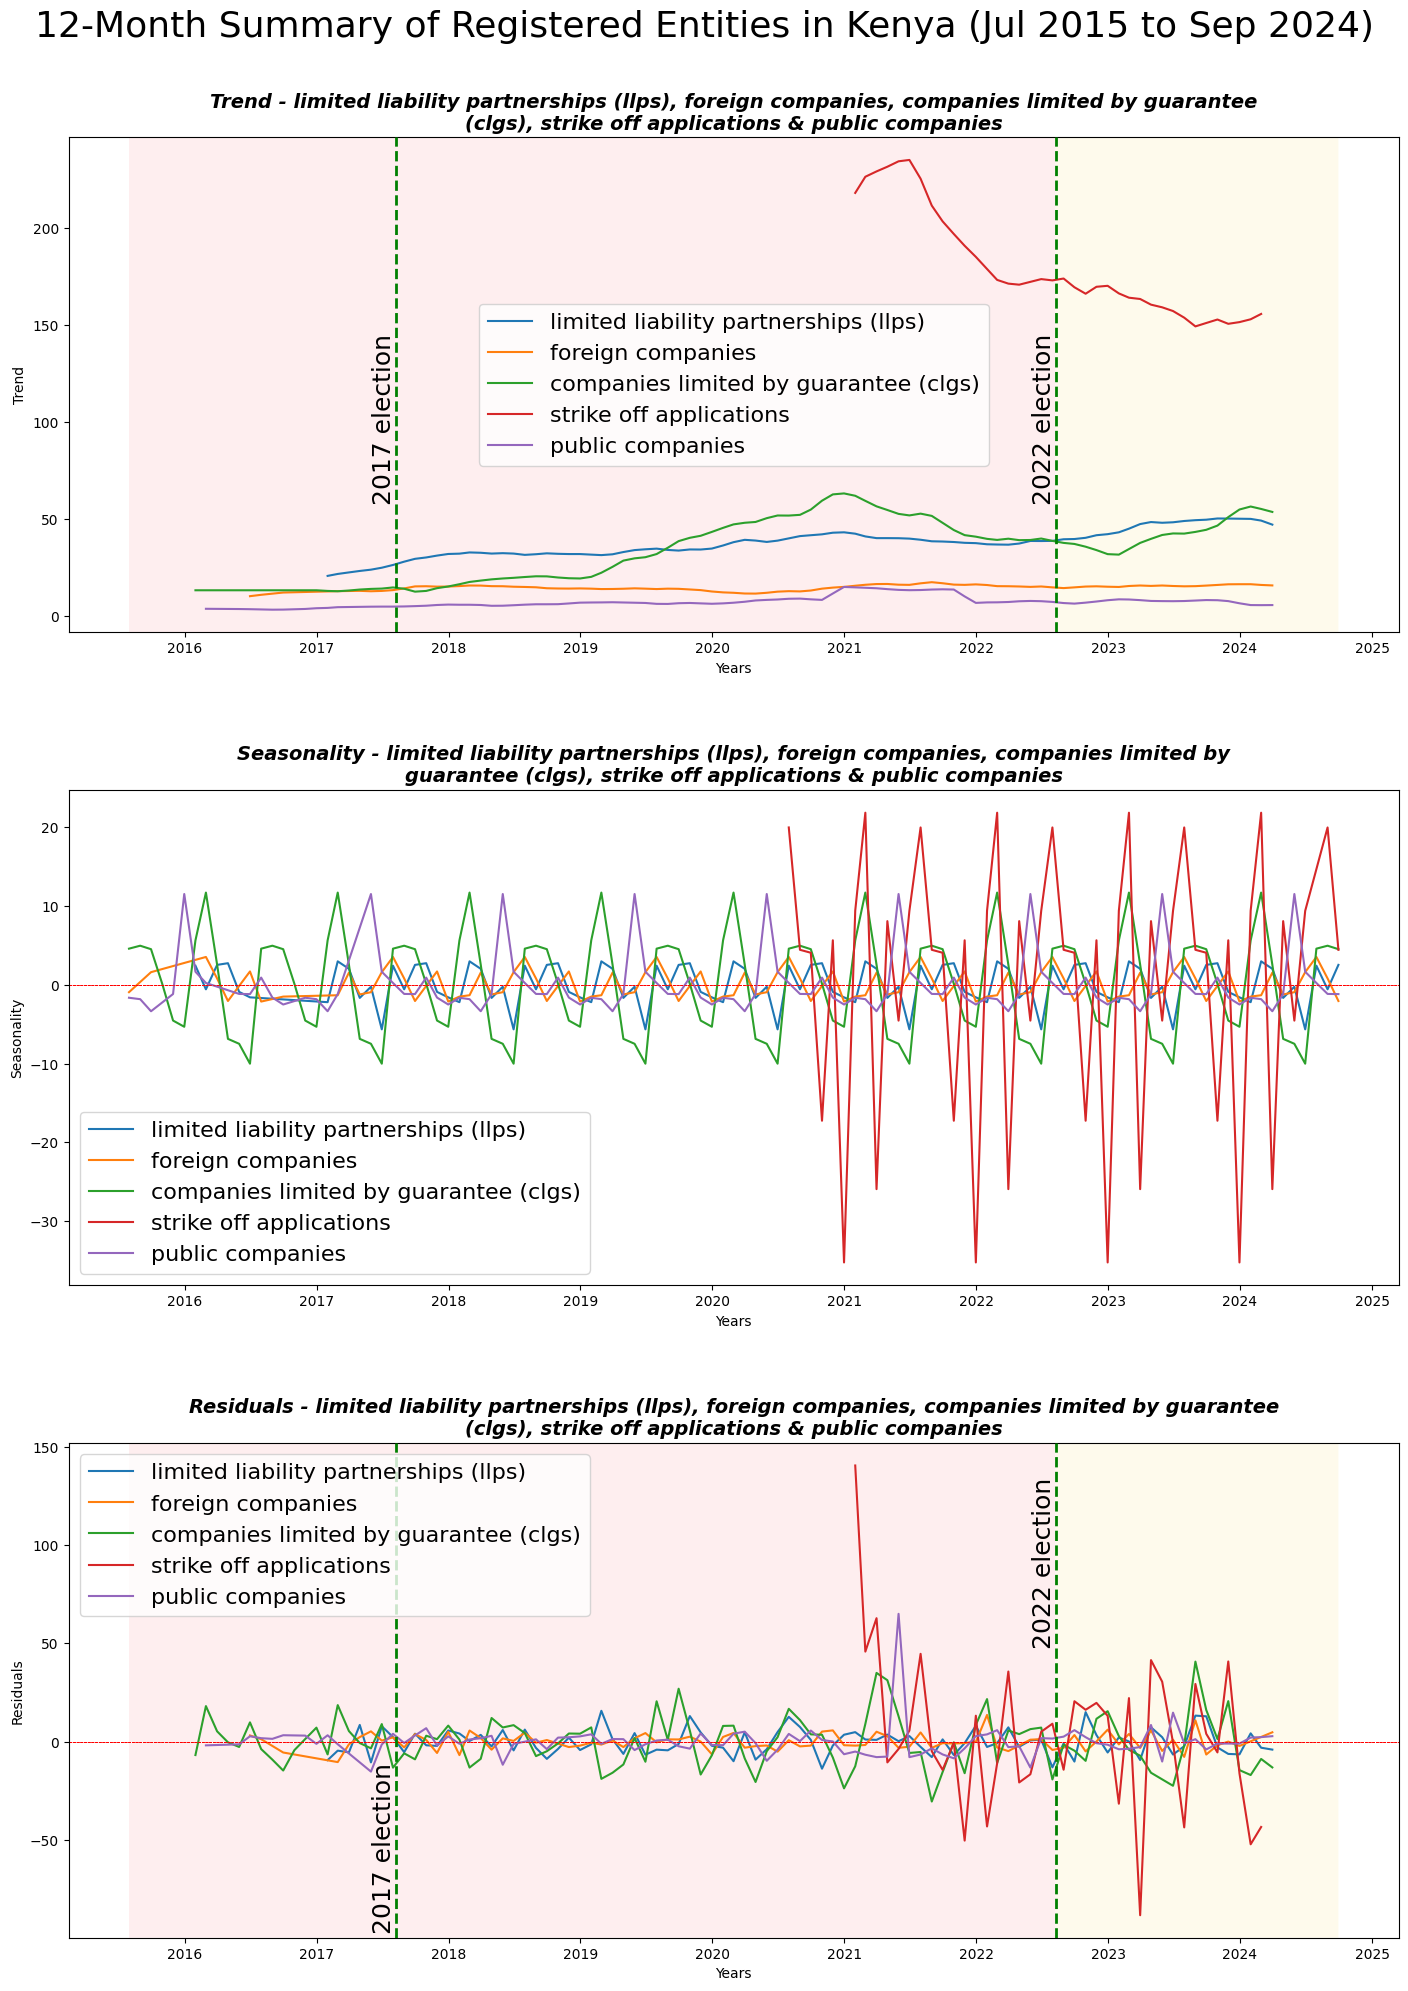

In [12]:
plot_trend_and_seasonality(
    other_plot_columns, title_wrap = 100,
    title_args = { 'fontsize': 14, 'fontweight': 'bold', 'fontstyle': 'italic' },
    election_dates_y_trend = (60, 60), election_dates_y_resid = (-95, 50))

For other entity types, the trends are less pronounced due to lower numbers, but still show some seasonality and increasing volatility in residuals over time.

### Interactive Plots

The interative plots are for easier interaction.

In [13]:
#|output-when-format-pdf: "Please visit {{< meta html_uri >}} to view/interact with the plot."

def get_decomposition(
        columns_used: list[str], trend_period = 12, 
        out: dict[Literal['start_date', 'end_date', 'actual_columns_used'], str] = None):
    actual_columns_used = []
    for column_used in columns_used:
        plot_series = all_registrations[column_used].dropna()
        if len(plot_series) < 2 * trend_period:
            continue
        actual_columns_used.append(column_used)
        __start_date = min(plot_series.index.date)
        __end_date = max(plot_series.index.date)
        out['start_date'] = min(out['start_date'] or __start_date, __start_date)
        out['end_date'] = max(out['end_date'] or __end_date, __end_date)
        out['actual_columns_used'].append(column_used)
        yield seasonal_decompose(plot_series, model='additive', period=trend_period), column_used

def draw_election_lines(start_date, end_date, fig, row, election_dates_y):
    date_list = [
        min(start_date, date(2017, 1, 1)) + timedelta(days=x) 
        for x 
        in range((end_date - start_date).days + 1)
    ]
    election_date_2017 = date(2017, 8, 9)
    election_date_2022 = date(2022, 8, 9)
    # Add vertical lines for election dates
    fig.add_vline(x=election_date_2017, line=dict(color='green', width=2, dash='dash'), row=row, col=1)
    fig.add_vline(x=election_date_2022, line=dict(color='green', width=2, dash='dash'), row=row, col=1)
    # Add colored regions
    fig.add_vrect(x0=min(date_list), x1=election_date_2022, fillcolor='#f62f3c', 
                  opacity=0.08, layer='below', line_width=0, row=row, col=1)
    fig.add_vrect(x0=election_date_2022, x1=max(date_list), fillcolor='#f8c811', 
                  opacity=0.08, layer='below', line_width=0, row=row, col=1)
    # Add text annotations for election dates
    fig.add_annotation(x=election_date_2017, y=election_dates_y[0], text='2017 election', 
                       textangle=-90, font=dict(size=18), showarrow=False, xanchor='right', 
                       row=row, col=1)
    fig.add_annotation(x=election_date_2022, y=election_dates_y[1], text='2022 election', 
                       textangle=-90, font=dict(size=18), showarrow=False, xanchor='right', 
                       row=row, col=1)
def interactive_plot(
        columns_used: list[str], trend_period = 12,
        election_dates_y_trend = (6000, 4600), election_dates_y_resid = (1100, 1100)):
    subplot_titles = ['Summary Trend', 'Summary Seasonality', 'Summary Residuals']
    fig = make_subplots(rows=3, cols=1, vertical_spacing=0.1, subplot_titles=subplot_titles,
        shared_xaxes=True, figure=go.Figure(layout=go.Layout(height=1000, width=1000)))
    out = {
        'start_date': None,
        'end_date': None,
        'actual_columns_used': []
    }
    for (decomposition, column_used), color_used in zip(
        get_decomposition(columns_used, trend_period, out), px.colors.qualitative.Plotly[3:]):
        # Plot trend component
        fig.add_trace(go.Scatter(
            x=decomposition.trend.index, y=decomposition.trend.values, mode='lines', 
            name=column_used, legendgroup=column_used, showlegend=True, line=dict(color=color_used)), 
            row=1, col=1)
        # Plot seasonal component
        fig.add_trace(go.Scatter(
            x=decomposition.seasonal.index, y=decomposition.seasonal.values, mode='lines', 
            name=column_used, legendgroup=column_used, showlegend=False, line=dict(color=color_used)), 
            row=2, col=1)
        fig.add_hline(y=0, line=dict(color='red', width=0.5, dash='dash'), row=2, col=1)
        # Plot residual component
        fig.add_trace(go.Scatter(
            x=decomposition.resid.index, y=decomposition.resid.values, mode='lines', 
            name=column_used, legendgroup=column_used, showlegend=False, line=dict(color=color_used)), 
            row=3, col=1)
        fig.add_hline(y=0, line=dict(color='red', width=0.5, dash='dash'), row=3, col=1)
    start_date = out['start_date']
    end_date = out['end_date']
    if start_date:
        draw_election_lines(start_date, end_date, fig, 1, election_dates_y_trend)
        draw_election_lines(start_date, end_date, fig, 3, election_dates_y_resid)
        fig.update_layout(
            title=dict(
                text=(
                    f'{trend_period}-Month Summary of Registered Entities in Kenya'
                    f' ({start_date.strftime("%b %Y")} to {end_date.strftime("%b %Y")})'
                    '<br>'
                    'Trend - Seasonality - Residuals'
                ),
                font=dict(size=26),
                x=0.5,
                xanchor='center',

                 
                y = 0.95,
                yanchor = 'top',
            ),
            showlegend=True,
            legend=dict(font=dict(size=16)),
        )
        fig.update_layout(margin=dict(t=140))
    fig.update_xaxes(showticklabels=True, title_text="Years", row=1, col=1)
    fig.update_xaxes(showticklabels=True, title_text="Years", row=2, col=1)
    fig.update_xaxes(showticklabels=True, title_text="Years", row=3, col=1)
    fig.update_yaxes(title_text="Trend", row=1, col=1)
    fig.update_yaxes(title_text="Seasonality", row=2, col=1)
    fig.update_yaxes(title_text="Residuals", row=3, col=1)
    return fig

interactive_plot(plot_columns + other_plot_columns)

### Archiving the Data

The dataset has been archived at <https://huggingface.co/datasets/ToKnow-ai/Summary-of-Registered-Entities-and-Companies-in-Kenya>

In [14]:
#|output: false
#|echo: false

from python_utils.upload_dataset import upload_dataframe_to_huggingface

# Summary of Registered Entities/Companies in Kenya
repo_id = "ToKnow-ai/Summary-of-Registered-Entities-and-Companies-in-Kenya"

upload_dataframe_to_huggingface(
    all_registrations, 
    repo_id=repo_id, 
    dataset_name="Summary of Registered Entities and Companies in Kenya", 
    split="data",
    preserve_index = True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/3.35k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


'Summary of Registered Entities and Companies in Kenya' dataset uploaded successfully.
repo_id: 'ToKnow-ai/Summary-of-Registered-Entities-and-Companies-in-Kenya'
revision:'2d74bca6183baff72312428315bca01de78a8bb1'
url: 'https://huggingface.co/datasets/ToKnow-ai/Summary-of-Registered-Entities-and-Companies-in-Kenya'


<!-- #| .content-visible when-format: "html" -->

{{< iframe 
  'Loading Summary of Registered Entities and Companies in Kenya...' 
  src="https://huggingface.co/datasets/ToKnow-ai/Summary-of-Registered-Entities-and-Companies-in-Kenya/embed/viewer/Summary%20of%20Registered%20Entities%20and%20Companies%20in%20Kenya/data"
  frameborder="0"
  width="100%"
  height="560px" >}}

## Key Findings

1. **Dominance of Business Names and Private Companies**: 
These two categories consistently outpace other forms of registration, indicating a preference for simpler business structures among Kenyan entrepreneurs.

2. **Transition Between Political Eras**:
   - The Uhuru/Jubilee era (pre-2022) showed a general upward trend in registrations, particularly for business names and private companies.
   - The early Ruto/UDA era (post-2022) exhibits some volatility in registration numbers, with a slight downward trend observable in some categories.

3. **Resilience of the Entrepreneurial Spirit**
Despite political transitions and global events (such as the COVID-19 pandemic, which falls within this period), the overall trend of business registrations remains positive. This suggests a robust entrepreneurial spirit in Kenya that persists through various challenges.

4. **Seasonal Patterns**: Business registrations tend to peak in the first quarter of the year (January-March) and again in August, possibly reflecting fiscal year planning.

5. **Rise in Strike Off Applications**: There's a notable increase in strike off applications starting in 2021, which could indicate economic stress or regulatory changes affecting business closures.

6. **Slowdown in Growth**: Recent years show a slowdown in the growth rate of new business registrations, particularly after 2021, which may reflect broader economic challenges.

<!-- ## Implications and Discussion

1. **Political Stability and Business Confidence**: The relatively minor impact of the 2022 election compared to 2017 might indicate growing confidence in Kenya's political stability among entrepreneurs.

2. **Economic Policy Impact**: The shifts in registration trends between political eras could reflect changes in economic policies or business environment perceptions under different administrations.

3. **Formalization of the Economy**: The consistent growth in formal business registrations until recent years may indicate a gradual formalization of Kenya's economy, a key goal for many developing nations.

4. **Entrepreneurial Resilience**: Despite recent slowdowns, the overall trend of business registrations remains positive over the decade, speaking to the resilience and adaptability of Kenya's entrepreneurs.

5. **Economic Challenges**: The recent decline in growth rates and increase in strike off applications may signal economic headwinds that policymakers should address.

6. **Seasonal Business Planning**: The clear seasonality in registrations could inform government services and support programs for new businesses. -->

## Conclusion

This analysis of Kenya's business registration trends offers a unique window into the country's economic dynamics and the interplay between politics and entrepreneurship. While political transitions and global events like the COVID-19 pandemic have impacted business formation, the overall trend suggests a resilient formal business sector in Kenya.

As Kenya continues to position itself as a key economic player in East Africa, understanding these trends can be crucial for policymakers, investors, and entrepreneurs alike. Future research could delve deeper into sector-specific trends or compare Kenya's patterns with those of neighboring countries to provide a more comprehensive regional perspective.